<a href="https://colab.research.google.com/github/gnellany/AI-Classification/blob/master/CatVsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gerrynellany","key":"03537d29a019acd0fd250eb50c5ad810"}'}

In [0]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Jan  3 20:11 kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# List available datasets.
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 99% 269M/271M [00:04<00:00, 75.7MB/s]
100% 271M/271M [00:04<00:00, 68.8MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 116MB/s]
 99% 538M/544M [00:09<00:00, 110MB/s] 
100% 544M/544M [00:09<00:00, 59.9MB/s]


In [0]:
from zipfile import ZipFile
file_name_1 = "train.zip"

with ZipFile(file_name_1, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
file_name_2 = "test.zip"

with ZipFile(file_name_2, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
!pip install numpy==1.16.1

In [0]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm


In [0]:
TRAIN_DIR = '/content/train'
TEST_DIR = '/content/test'
IMG_SIZE = 50
LR = 1e-3 #learing rate

MODEL_NAME = 'dogsvscat-{}-{}.model'.format(LR, '6conv-basic-video')

In [0]:
def label_img(img):
  #dog.93.png, remove word label name
  word_label = img.split('.')[-3]
  if word_label == 'cat': return[1,0]
  elif word_label == 'dog': return[0,1]


In [0]:
def create_train_data():
  training_data = []
  for img in tqdm(os.listdir(TRAIN_DIR)):
      label = label_img(img)
      path = os.path.join(TRAIN_DIR,img)
      img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
      training_data.append([np.array(img), np.array(label)])
  shuffle(training_data)
  np.save('train_data.npy', training_data)
  return training_data

In [0]:
def process_test_data():
  testing_data = []
  for img in tqdm(os.listdir(TEST_DIR)):
      path = os.path.join(TEST_DIR,img)
      img_num = img.split('.')[0]
      img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
      testing_data.append([np.array(img), img_num])
      
  np.save('test_data.npy', testing_data)
  return testing_data

In [0]:
#train_data = create_train_data()
#if you have train data: need to be same size as IMG_SIZE
train_data = np.load('/content/train_data.npy')
#If you are getting an error look at whats commented 

In [0]:
#%tensorflow_version 2.x

In [0]:
#DNN(Covnet)
#https://pythonprogramming.net/tflearn-machine-learning-tutorial/
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression



convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')# number of catogires
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')










Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
keep_dims is deprecated, use keepdims instead





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







In [0]:
#Check to see if there is previous trained data
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

INFO:tensorflow:Restoring parameters from /content/dogsvscat-0.001-6conv-basic-video.model
model loaded!


In [0]:
train = train_data[:-500]
test = train_data[-500:] #labeled test data

In [0]:
#Preprocessing and reshaping
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]


In [0]:
model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 3829  | total loss: 0.41123 | time: 61.557s
| Adam | epoch: 005 | loss: 0.41123 - acc: 0.8039 -- iter: 24448/24500
Training Step: 3830  | total loss: 0.41303 | time: 62.717s
| Adam | epoch: 005 | loss: 0.41303 - acc: 0.8032 | val_loss: 0.48654 - val_acc: 0.7840 -- iter: 24500/24500
--


In [0]:
model.save(MODEL_NAME)

INFO:tensorflow:/content/dogsvscat-0.001-6conv-basic-video.model is not in all_model_checkpoint_paths. Manually adding it.


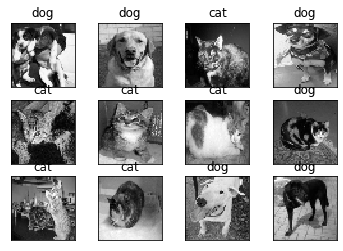

In [0]:
#Test trained data after model is done
import matplotlib.pyplot as plt

#if you don't have this file yet
#test_data = process_test_data()
#if you have it
test_data = np.load('/content/test_data.npy')

fig = plt.figure()

for num, data in enumerate(test_data[:12]):
  #cat[1:0], dog [0,1]
  img_num = data[1]
  img_data = data[0]

  y = fig.add_subplot(3,4,num+1)
  orig = img_data
  data = img_data.reshape(IMG_SIZE, IMG_SIZE,1)

  model_out = model.predict([data])[0]

  if np.argmax(model_out) == 1: str_label='dog'
  else: str_label='cat'

  y.imshow(orig, cmap='gray')
  plt.title(str_label)
  y.axes.get_xaxis().set_visible(False)
  y.axes.get_yaxis().set_visible(False)
plt.show()

In [0]:
with open('submission-file.csv','w') as f:
    f.write('id,label\n')

In [0]:
with open('submission-file.csv','a') as f:
  for data in tqdm(test_data):
      img_num = data[1]
      img_data = data[0]
      orig = img_data
      data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
      model_out = model.predict([data])[0]
      f.write('{},{}\n'.format(img_num, model_out[1]))

100%|██████████| 12500/12500 [00:26<00:00, 467.07it/s]
